# <font color='blue'>MAI5002 - Fundamentos de Matemática Aplicada</font>

## <font color='blue'>Mínimos Quadrados - Solução dos Exercícios </font>

### Material produzido por Luis Gustavo Nonato 

ICMC-USP

----

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Exercício 1)
Considere a função $f(x)=\exp(-x^2)$, $x\in[0,1]$. Usando o método dos mínimos quadrados, aproxime a função $f(x)$ por um polinômio quadrático e por um polinômio cúbico. Verifique o erro médio quadrático em cada um dos casos.

0.0001268328929439092 1.3399915608756554e-07


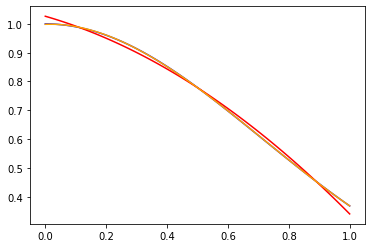

In [21]:
# Solução

t = np.linspace(0,1,100)
f = np.exp(-t**2)

plt.plot(t,f,color='blue')

# polinômio quadratico, montando a matriz 
Aq = np.ones((t.shape[0],3))
Aq[:,1] = t
Aq[:,2] = t**2

# polinômio cubico, montando a matriz 
Ac = np.ones((t.shape[0],4))
Ac[:,1] = t
Ac[:,2] = t**2
Ac[:,3] = t**3

# Resolvendo as equações normais
alphaq = np.linalg.solve(np.dot(Aq.T,Aq),np.dot(Aq.T,f))
alphac = np.linalg.solve(np.dot(Ac.T,Ac),np.dot(Ac.T,f))

yq = np.dot(Aq,alphaq)
yc = np.dot(Ac,alphac)

plt.plot(t,yq,color='red')
plt.plot(t,yc,color='orange')

Erroq = (np.linalg.norm(yq-f)**2)/t.shape[0]
Erroc = (np.linalg.norm(yc-f)**2)/t.shape[0]

print(Erroq,Erroc)

### Exercício 2)
Considere o conjunto de pontos armazenados como linhas no arquivo ``sample_func.dat`` (disponível para download no google drive). Aproxime o conjunto de pontos pela função 

$$
f(x) = \frac{a}{(2+b\cos(x))}
$$

utilizando mínimos quadrados para encontrar os valores de $a$ e $b$. Faça o gráfico dos pontos e da função obtida.

**Solução** Para que possamos empregar mínimos quadrados, precisamos linearizar a função $f(x)=\frac{a}{(2+b\cos(x))}$. Para isso realizamos a seguinte manipulação algébrica:

$$
g(x) = \frac{1}{f(x)} = \frac{2}{a}+\frac{b}{a}\cos(x) = c+d\cos(x)\\
\downarrow \\
\begin{bmatrix}
1 & cos(x_1) \\
1 & cos(x_2) \\
\vdots & \vdots \\
1 & cos(x_n)
\end{bmatrix}
\begin{bmatrix}
c \\ d
\end{bmatrix}=
\begin{bmatrix}
g(x_1) \\
g(x_2) \\
\vdots  \\
g(x_n)
\end{bmatrix}
$$

Utilizamos mínimos quadrados para calcular $c$ e $d$ e então obtemos:

$$
a = \frac{2}{c}, \quad b = a\,d
$$

1.9840113331676488 1.0127899624410182


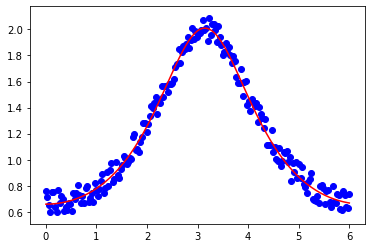

In [49]:
X=np.loadtxt('sample_func.dat')

# montando a matriz de mínimos quadrados
A = np.ones((X.shape[0],2))
A[:,1] = np.cos(X[:,0])

# resolvendo a equação normal
g = 1.0/X[:,1]
cd = np.linalg.solve(np.dot(A.T,A),np.dot(A.T,g))  # cd[0] corresponde ao c e cd[1] ao d

# calculado a e b
a = 2/cd[0]
b = a*cd[1]

print(a,b)

f = a/(2+b*np.cos(X[:,0]))

plt.scatter(X[:,0],X[:,1],color='blue')
plt.plot(X[:,0],f,color='red')

### Exercício 3)
Utiliza mínimos quadrados para aproximar a função

$$
f(x)=(x^3-1)^2, \quad x\in[0,1]
$$

por uma reta $r(x)=a+bx$, de modo que o erro médio quadrático seja mínimo e que a reta passe pelo ponto $r(1)=0$.

**Solução**

A restrição $r(1)=0$ implica que $b=-a$, assim, a aproximação se torna:

$$
f(x) \approx a - ax \rightarrow f(x) \approx a(1-x)
$$

Neste caso a matriz de mínimos quadrados se torna um vetor coluna:

$$
\begin{bmatrix}
(1-x_1) \\
(1-x_2) \\
\vdots  \\
(1-x_n)
\end{bmatrix}a = 
\begin{bmatrix}
f(x_1) \\
f(x_2) \\
\vdots  \\
f(x_n)
\end{bmatrix}
$$

Assim, denotando os vetores da equação acima como $\mathbf{c}=[(1-x_1),\ldots,(1-x_n)]^\top$ e $\mathbf{f}=[f(x_1),\ldots,f(x_n)]^\top$ a solução da equação normal é simplesmente:

$$
a = \frac{\mathbf{c}^\top\mathbf{f}}{\mathbf{c}^\top\mathbf{c}}
$$

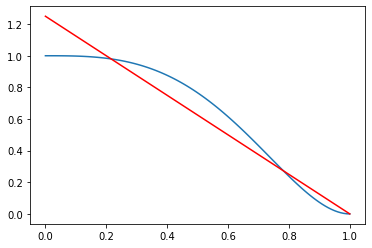

In [53]:
x = np.linspace(0,1,100)

f = (x**3-1)**2
plt.plot(x,f)

# construindo os vetores colunas
c = 1-x

# resolvendo a equacao normal
a = np.dot(c,f)/np.dot(c,c)

r = a - a*x
plt.plot(x,r,color='red')

### Exercício 4)
Encontre a matrix de projeção ortogonal dos pontos em $\mathbb{R}^3$ sobre o plano dado pela equação $2x-y-z=0$. Faça o gráfico do plano e de um conjunto de pontos projetados sobre ele.

In [68]:
# Solução

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib qt 

# Vamos encontrar uma base para o espaço correspondendo ao plano 2x-y-z=0
# e armazena-la como colunas de uma matriz A

A = np.array([[1,1,1],[0,-1,1]]).T

# gerando o plano 
normal_t = np.cross(A[:,0],A[:,1])
xx, yy = np.meshgrid(range(-3,3), range(-3,3))
zz = -(normal_t[0] * xx + normal_t[1] * yy)/normal_t[2]

# plot do plano
fig1 = plt.figure()
ax1 = fig1.add_subplot(111,projection='3d')
ax1.plot_surface(xx, yy, zz, alpha=0.2)
ax1.set_title('Espaco Linha')

# plot da origem
ax1.scatter(0,0,0,s=25,color='k')

# plot dos vetores base do plano
x1 = A[:,0]/np.linalg.norm(A[:,0])
x2 = A[:,1]/np.linalg.norm(A[:,1])
ax1.quiver(0, 0, 0, x1[0],x1[1],x1[2],color='blue')
ax1.quiver(0, 0, 0, x2[0],x2[1],x2[2],color='red')

# Definindo 5 pontos quaisque em R3
B = np.random.uniform(-2.9,2.9,size=(3,5))

# Projetando os pontos sobre o plano
# encontrando os coeficientes de cada ponto
x = np.linalg.solve(np.dot(A.T,A),np.dot(A.T,B))

# encontrando as projeções
P = np.dot(A,x)
print(P)

# Plot dos pontos originais
ax1.scatter(B[0,:],B[1,:],B[2,:],s=25,color='red')
    
# Plot dos pontos projetados
ax1.scatter(P[0,:],P[1,:],P[2,:],s=25,color='blue')
    
# Plot das distancias
for i in range(B.shape[1]):
    ax1.plot([P[0,i],B[0,i]],[P[1,i],B[1,i]],[P[2,i],B[2,i]],color='k',linestyle='--')
    
    
ax1.quiver(0,0,0,normal_t[0],normal_t[1],normal_t[2],color='k')

[[-0.68864358  1.44303249 -0.32181722  1.53258074 -1.41243593]
 [ 1.95161653  0.72686258  0.5157709   1.71270662 -2.92084534]
 [-3.32890368  2.15920241 -1.15940534  1.35245487  0.09597349]]


### Exercício 5)
O código abaixo gera pontos em um espaço $\mathbb{R}^k$ ($k=3$ no exemplo) seguindo duas distribuições normais multivariadas. Como o método de mínimos quadrados poderia ser utilizado para encontrar um hiperplano de dimensão k-1 que aproxime os pontos? 

O método funciona sempre? Quais são as condições para que o método resulte em uma solução válida.

In [63]:
n = 200  # numero de pontos
k = 3    # dimensão do espaço

X = np.zeros((n,k))

# Normal multivariada centrada na origem
X[:int(n/2),:] = np.random.multivariate_normal(np.zeros(k),0.1*np.diag(np.ones(k)),int(n/2))
X[int(n/2):,:] = np.random.multivariate_normal(np.ones(k),0.1*np.diag(np.ones(k)),int(n/2))

**Solução**
Para que possamos encontrar o subespaço, devemos interpretar os pontos como sendo o gráfico de uma função 

$$
f:\mathbb{R}^k-1\rightarrow\mathbb{R}
$$

ou seja, os pontos devem ser da forma $[x_1,x_2,\ldots,x_{k-1},f(x_1,x_2,\ldots,x_{k-1})]$, onde a última coordenada é uma função das $k-1$ outras coordenadas. Assim, o subspaço (hiperplano) seria dado por:

$$
\begin{matrix}
a_0+a_1x_{11}+a_2x_{12}+\cdots+a_{k-1}x_{1(k-1)}\approx f(a_0+a_1x_{11}+a_2x_{12}+\cdots+a_{k-1}x_{1(k-1)})=x_{1k}\\
a_0+a_1x_{21}+a_2x_{22}+\cdots+a_{k-1}x_{2(k-1)}\approx f(a_0+a_1x_{21}+a_2x_{22}+\cdots+a_{k-1}x_{2(k-1)})=x_{2k}\\
\vdots\\
a_0+a_1x_{n1}+a_2x_{n2}+\cdots+a_{k-1}x_{n(k-1)}\approx f(a_0+a_1x_{n1}+a_2x_{n2}+\cdots+a_{k-1}x_{n(k-1)})=x_{nk}
\end{matrix}\\
\downarrow \\
\begin{bmatrix}
1 & x_{11} & x_{12}  & \cdots & x_{1(k-1)}\\
1 & x_{21} & x_{22} & \cdots & x_{2(k-1)}\\
 &  &  & \vdots  & \\
1 & x_{n1} & x_{n2} & \cdots & x_{n(k-1)}
\end{bmatrix}
\begin{bmatrix}
a_0 \\ a_1 \\ a_2 \\ \vdots \\ a_{k-1}
\end{bmatrix}\approx
\begin{bmatrix}
x_{1k}\\
x_{2k}\\
\vdots\\
x_{nk}
\end{bmatrix}
$$

Utilizando mínimos quadrados encontramos os valores dos coeficientes $a_i$. 

In [66]:
# montando a matriz
A = np.ones((X.shape[0],X.shape[1]))
A[:,1:] = X[:,:-1]

alpha = np.linalg.solve(np.dot(A.T,A),np.dot(A.T,X[:,-1]))

# gerando o plano 
normal_t = np.zeros(k)
normal_t[:-1] = alpha[1:]
normal_t[-1] = -1
xx, yy = np.meshgrid(range(-3,3), range(-3,3))
zz = -(normal_t[0] * xx + normal_t[1] * yy)/normal_t[2]

# plot do plano
fig1 = plt.figure()
ax1 = fig1.add_subplot(111,projection='3d')
ax1.plot_surface(xx, yy, zz, alpha=0.2)
ax1.set_title('Espaco Linha')

# plot dos pontos
ax1.scatter(X[:,0],X[:,1],X[:,2],s=25,color='red')

**Imporante**: O método acima só funciona se não existirem dois pontos com as mesmas coordenadas $x_1,\ldots,x_{k-1}$, caso contrário a matriz de mínimos quadrados se torna singular. Além disso, temos que $n>k$ pontos no conjunto de dados (justifique estas afirmações).

### Exercício 6)
O método dos mínimos quadrados pode ser difícil de resolver quando as colunas da matriz são quase linearmente dependentes, pois a solução do sistema de equações normais pode ficar instável. A solução típica para este problema é encontrar uma base ortogonal (ortonormal) para o espaço coluna da matriz e utilizar esta base na solução de mínimos quadrados.

Dada a matriz $X$ construída no código abaixo (a segunda coluna é uma perturbação da primeira), encontre uma base ortogonal para as colunas de $X$ e projete o ponto $\mathbf{b}=[1,1,1,1,1]$ sobre o espaço coluna.

In [2]:
X = np.random.uniform(0,1,size=(5,2))
X[:,1] = X[:,0] + np.random.uniform(-0.001,0.001,X.shape[0])

b = np.array([1,1,1,1,1])

**Solução**

Para encontrar a base ortogonal basta calcularmos a decomposição QR da matriz $\mathbf{X}$.

$$
\mathbf{X}=\mathbf{Q}\mathbf{R}\\
\downarrow\\
\mathbf{Q}\mathbf{R}\mathbf{\alpha}=\mathbf{b}\\
\downarrow\\
\mathbf{R}\mathbf{\alpha}=\mathbf{Q}^\top\mathbf{b}
$$

Note que a matriz $\mathbf{R}$ é quadrada com colunas LI, logo o sistema pode ser resolvido diretamente. A projeção de $\mathbf{b}$ será dada por 

$$
\mathbf{p} = \mathbf{Q}\mathbf{\alpha}
$$

In [5]:
import numpy as np

# Calculando a decomposição QR

Q,R = np.linalg.qr(X)
print('dimensao de Q',Q.shape)
print('dimensao de R',R.shape)

# projetando o ponto b
alpha = np.linalg.solve(R,np.dot(Q.T,b))
p = np.dot(Q,alpha)

print(p)

dimensao de Q (5, 2)
dimensao de R (2, 2)
[-417.85406463  190.70657376  105.7340763    -4.87596923 -482.3415851 ]


**Obs:** Tente resolver as equações normais utilizando diretamente a matriz $\mathbf{X}$ e veja o que acontece.